# TensorFlow 1 - Iterative regression

In this example (taken from the [TensorFlow website](https://www.tensorflow.org/versions/r0.7/get_started/index.html)),
setting up of a tensorflow calculation is shown, along with some of the numerical optimization infrastructure 
that is already there

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

/miniconda/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/miniconda/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


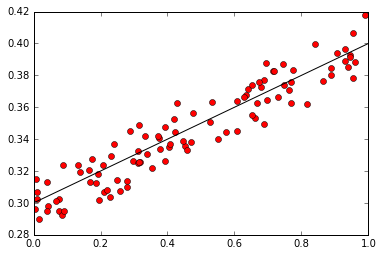

In [10]:
# Create 100 phony x, y data points in NumPy, y = x * 0.1 + 0.3
x_data = np.random.rand(100).astype(np.float32)
y_data = x_data * 0.1 + 0.3 + (2*np.random.rand(100)-1)*0.02

pltpoints = np.linspace(0,1,100)
plt.plot(x_data, y_data, 'ro')
plt.plot(pltpoints, pltpoints*0.1 + 0.3, 'k-')

Here we see a bit about how TensorFlow works.  Variables that we'll be calculating on are explicitly labeled as such, and a computation graph is built leading through the steps - here, calculation of a mean, a descent optimizer, and a minimization step - before anything is actually run.

This building of a flow graph along which tensors flow allows the runtime to figure out what needs to go where, and when. 

In [11]:
# Try to find values for W and b that compute y_data = W * x_data + b
# (We know that W should be 0.1 and b 0.3, but Tensorflow will
# figure that out for us.)
W = tf.Variable(tf.random_uniform([1], -1.0, 1.0))
b = tf.Variable(tf.zeros([1]))
y = W * x_data + b

# Minimize the mean squared errors.
loss = tf.reduce_mean(tf.square(y - y_data))
optimizer = tf.train.GradientDescentOptimizer(0.5)
train = optimizer.minimize(loss)

# Before starting, initialize the variables.  We will 'run' this first.
init = tf.initialize_all_variables()

# Launch the graph.
sess = tf.Session()
sess.run(init)

# Fit the line.
for step in range(201):
    sess.run(train)
    if step % 20 == 0:
        print(step, sess.run(W), sess.run(b))

0 [-0.12804499] [ 0.54141712]
20 [ 0.03323855] [ 0.33169207]
40 [ 0.08534745] [ 0.30573085]
60 [ 0.09810027] [ 0.29937726]
80 [ 0.10122129] [ 0.29782236]
100 [ 0.10198512] [ 0.29744181]
120 [ 0.10217206] [ 0.29734868]
140 [ 0.1022178] [ 0.29732588]
160 [ 0.10222901] [ 0.29732028]
180 [ 0.10223175] [ 0.29731894]
200 [ 0.10223241] [ 0.29731858]


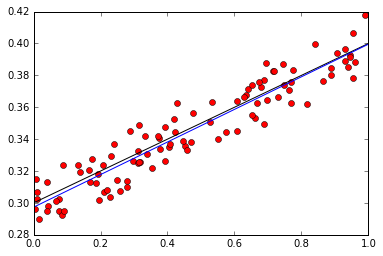

In [12]:
pltpoints = np.linspace(0,1,100)
plt.plot(x_data, y_data, 'ro')
plt.plot(pltpoints, pltpoints*0.1 + 0.3, 'k-')
plt.plot(pltpoints, pltpoints*sess.run(W) + sess.run(b), 'b-')

In [14]:
sess.close()